## Prepare Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.set_index('PassengerId', inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [ ]:
# Apakah ada missing value atau kategorikal data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Checking null value
plt.figure(figsize=(8,8))
px.imshow(train_df.isnull()/1,  width=600, height=400,
          title ="Missing Value")

<Figure size 576x576 with 0 Axes>

In [ ]:
# Checking categorical value
train_df.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


Cabin Null Value Percentage: 77.1 %


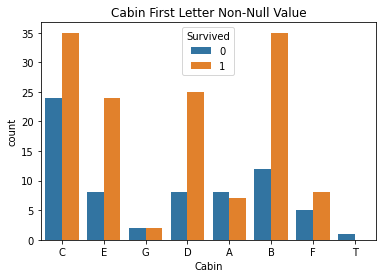

In [ ]:
# Checking cabin relationship with survived
sns.countplot(train_df[train_df.Cabin.notnull()]['Cabin'].str[0], hue=train_df['Survived'])
plt.title('Cabin First Letter Non-Null Value')
print("Cabin Null Value Percentage:",round(train_df.Cabin.isnull().sum()/train_df.shape[0]*100,2),'%')

In [ ]:
# Seberapa banyak unique value among diskrit columns
fig = px.bar(train_df.drop(['Fare', 'Age'], axis=1).nunique(),
             labels={"index": "Column",
                      "value": "Nunique"},
             width = 600 , height = 400,
             title = 'Unique Value Among Discrete Columns')

fig.update_layout(showlegend=False)

In [ ]:
# Bagaiamana korelasi antar sesama fitur
px.imshow(train_df.drop('Survived', axis=1).corr().round(2), 
          text_auto=True, width = 600 , height = 400,
          title = 'Correlation among Features')

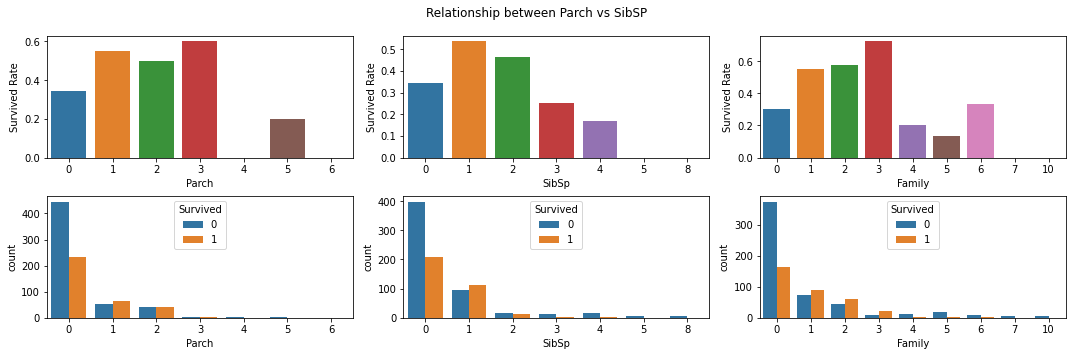

In [ ]:
# Relationship between Parch and SibSp
fig , ax = plt.subplots(2,3, figsize=(15,5))

Family = train_df['SibSp']+train_df['Parch']
sns.barplot('Parch','Survived',data=train_df,ci=None, ax=ax[0][0]).set_ylabel('Survived Rate')
sns.barplot('SibSp','Survived',data=train_df,ci=None, ax=ax[0][1]).set_ylabel('Survived Rate')
axes = sns.barplot(Family,train_df['Survived'],ci=None, ax=ax[0][2])
axes.set_xlabel('Family')
axes.set_ylabel('Survived Rate')

sns.countplot(train_df['Parch'] , hue=train_df['Survived'], ax=ax[1][0])
legend = ax[1][0].legend(loc=9)
legend.set_title('Survived')
sns.countplot(train_df['SibSp'] , hue=train_df['Survived'], ax=ax[1][1])
legend = ax[1][1].legend(loc=9)
legend.set_title('Survived')
sns.countplot(Family , hue=train_df['Survived'], ax=ax[1][2]).set_xlabel('Family')
legend = ax[1][2].legend(loc=9)
legend.set_title('Survived')

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Relationship between Parch vs SibSP');

Text(0.5, 0.98, 'Correlation Between Discrete Features and Target')

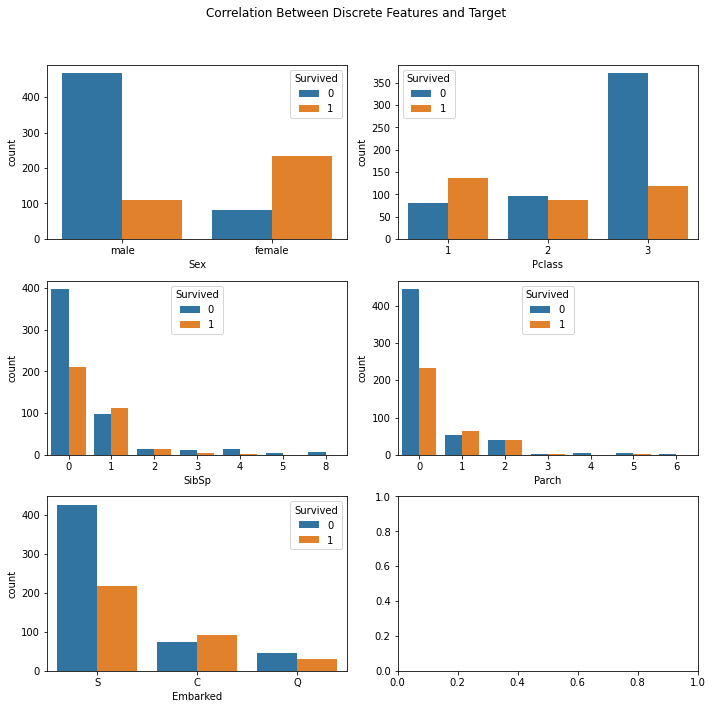

In [ ]:
# Hubungan fitur dengan target
fig , ax = plt.subplots(3,2, figsize=(10,10))

kolom = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
cnt = 0
for i in ax:
  for j in i:
    try:
      sns.countplot(kolom[cnt], hue='Survived', data=train_df, ax=j)
      cnt+=1
    except: pass

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Correlation Between Discrete Features and Target')

Text(0.5, 0.98, 'Continious Features Distribution')

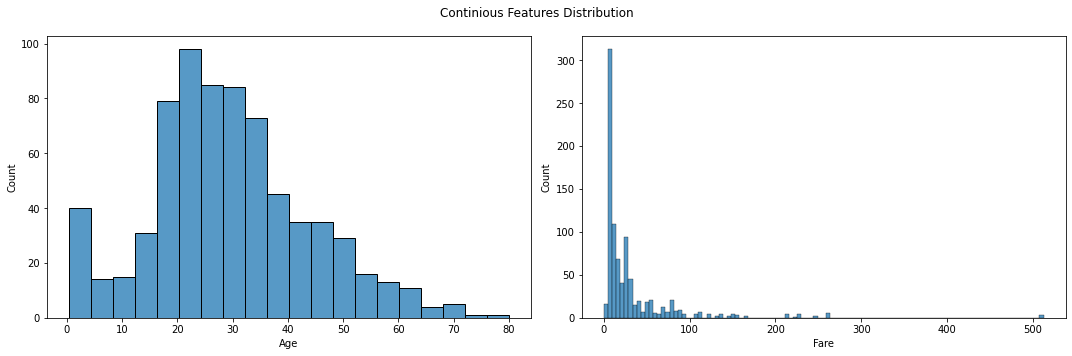

In [ ]:
# Dsitrbiusi kontinu variabel
fig , ax = plt.subplots(1,2, figsize=(15,5))
kolom = ['Age', 'Fare']
cnt = 0
for i in ax:
      sns.histplot(train_df[kolom[cnt]], ax=i)
      cnt+=1

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle("Continious Features Distribution")

Text(0.5, 0.98, 'Parch Feature Distribution')

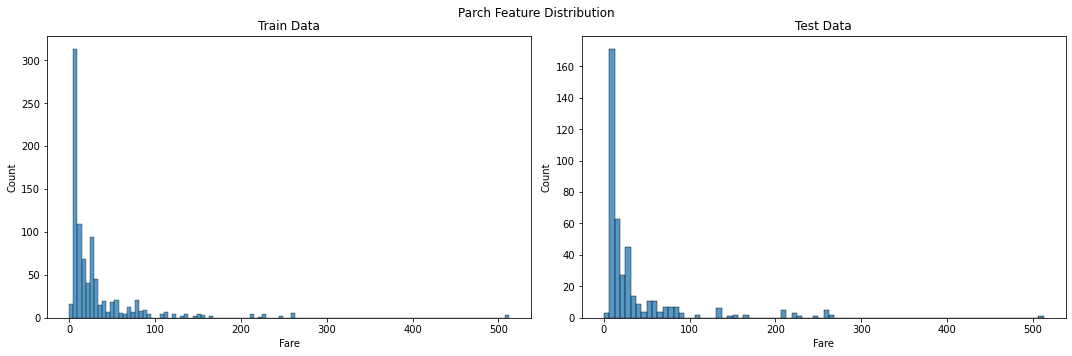

In [ ]:
# Checking Patch Outlier
fig , ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(train_df['Fare'], ax=ax[0])
ax[0].set_title('Train Data')
sns.histplot(test_df['Fare'], ax=ax[1])
ax[1].set_title('Test Data')

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle("Parch Feature Distribution")

Text(0.5, 0.98, 'Features Distribution')

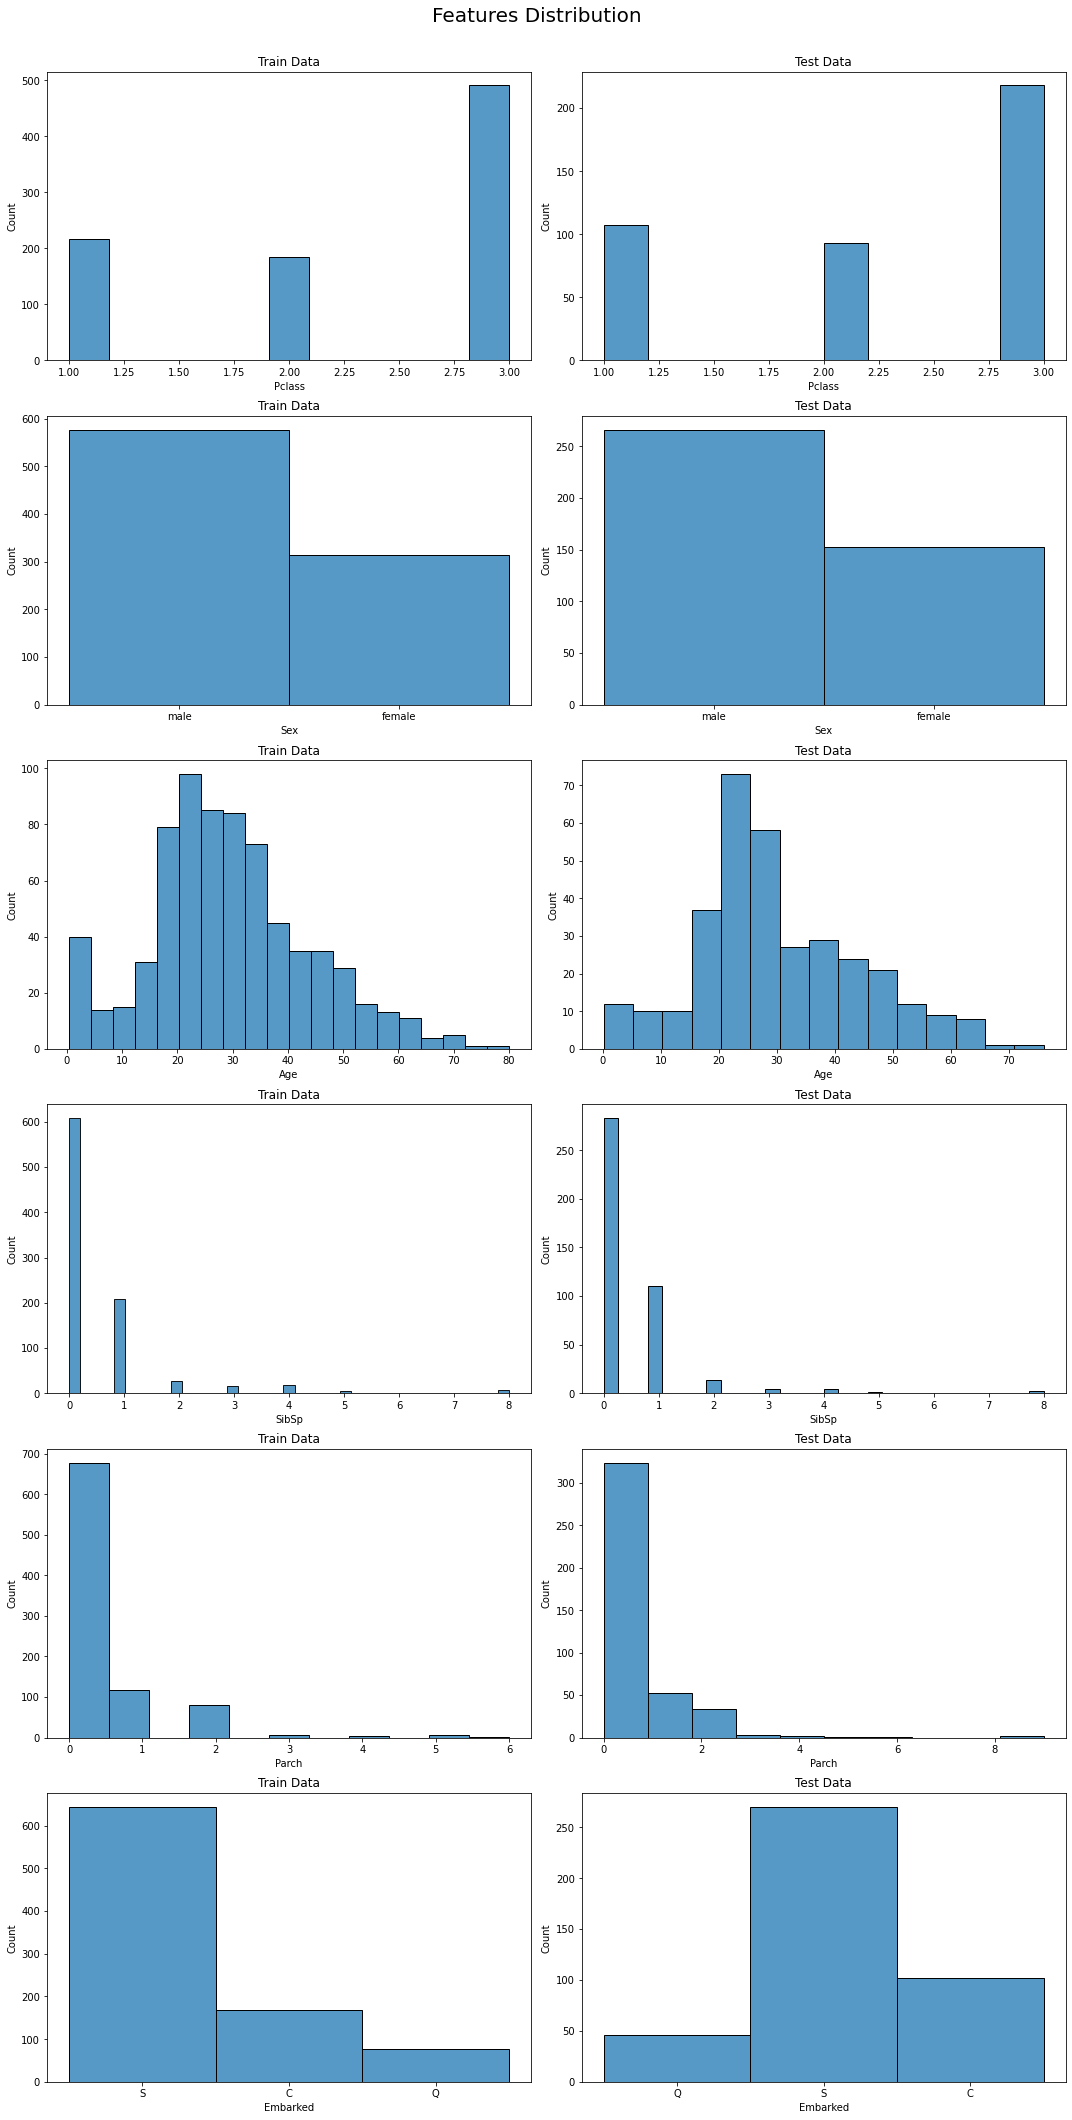

In [ ]:
# Checking Distribution of train and test data
columns = train_df.drop(['Survived','Fare','Ticket','Cabin','Name'], axis=1).columns
fig , ax = plt.subplots(len(columns) ,2, figsize=(15,30))

for i,j in zip(columns , ax):
  sns.histplot(train_df[i], ax=j[0])
  j[0].set_title('Train Data')
  sns.histplot(test_df[i], ax=j[1])
  j[1].set_title('Test Data')

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Features Distribution", fontsize=20)

## Feature Engineering

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def FE_Name(data):
  temp_df = data.copy()
  title = ['Mr', 'Miss', 'Mrs', 'Master']

  temp_df[title]=0

  for i in title:
    temp_df[i] = temp_df['Name'].str.contains(i).astype(int)

  for i in temp_df.index:
    if temp_df.loc[i,'Mrs']:
      temp_df.loc[i,'Mr'] = 0

  temp_df.drop('Name', axis=1, inplace=True)

  return temp_df

In [ ]:
FE_Name(train_df).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,Master
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0


In [ ]:
def FE_Ticket(data, train=train_df):

  temp_df = data.copy()
  temp_df['Ticket'] = temp_df['Ticket'].str.split(' ').str[-1].str[:2]

  val_count = train['Ticket'].value_counts()
  other = val_count[val_count<10].index

  temp_df['Ticket'] = [x if x not in other else 'other_ticket' for x in temp_df['Ticket']]
  temp_df = pd.concat([temp_df, pd.get_dummies(temp_df['Ticket'])], axis=1)
  temp_df.drop('Ticket', axis=1, inplace=True)
  return temp_df

In [ ]:
FE_Ticket(train_df).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,40,41,43,45,48,54,55,57,62,65,66,69,70,72,75,84,85,92,95,LI
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def FE_Family(data):
  temp_df = data.copy()
  temp_df['Family'] = temp_df['SibSp']+temp_df['Parch']
  return temp_df

In [ ]:
FE_Family(train_df).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
def FE_Cabin(data):

  temp_df = data.copy()
  temp_df['Cabin'] = temp_df['Cabin'].str[0] 
  
  idx = temp_df[temp_df['Cabin'] == 'T'].index
  temp_df.loc[idx, 'Cabin'] = 'A'

  temp_df['Cabin'] = temp_df['Cabin'].replace(['A','B','C'],'abc')
  temp_df['Cabin'] = temp_df['Cabin'].replace(['D', 'E'], 'de')
  temp_df['Cabin'] = temp_df['Cabin'].replace(['F', 'G'], 'fg')
  temp_df = pd.concat([temp_df, pd.get_dummies(temp_df['Cabin'])], axis=1)
  temp_df.drop('Cabin',axis=1,  inplace=True)
  return temp_df

In [ ]:
FE_Cabin(train_df).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,abc,de,fg
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0


## Preprocess data

In [ ]:
target = train_df['Survived']
train_df = train_df.drop('Survived', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 10) (712,)
(179, 10) (179,)


In [ ]:
def preprocess(data):
  data = FE_Name(data)
  
  data.drop(['Ticket','Parch','SibSp','Age','Cabin'], axis=1, inplace=True)
  data['Pclass'] = data['Pclass'].astype(str)
  data = pd.concat([ data.drop(['Pclass', 'Sex', 'Embarked'], axis=1),
                      pd.get_dummies(data[['Pclass', 'Sex', 'Embarked']])], axis=1)
  return data

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute(data, train):
  mis_col = ['Pclass','Age','SibSp','Parch','Fare']
  imputer = IterativeImputer()
  imputer.fit(data[mis_col])
  mis = pd.DataFrame(imputer.transform(data[mis_col]), columns = mis_col,
                            index = data.index)
  data = pd.concat([data.drop(mis_col, axis=1), mis], axis=1)
  return data

In [ ]:
X_train = impute(X_train, X_train)
X_train = preprocess(X_train)

X_test = impute(X_test, X_train)
X_test = preprocess(X_test)

## Model Selection

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# val_score = cross_validate(RandomForestClassifier(),X_train, y_train, scoring=["accuracy"], cv=10)
# val_score['test_accuracy'].mean()
model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy_score(model.predict(X_test), y_test)

0.7821229050279329

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
accuracy_score(model.predict(X_test), y_test)

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 42 kB/s 


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train)
accuracy_score(model.predict(X_test), y_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
accuracy_score(model.predict(X_test), y_test)

0.6703910614525139

## Hyperparameter tuning

In [ ]:
pip install scikit-optimize 

     |████████████████████████████████| 100 kB 4.0 MB/s 


In [ ]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    RandomForestClassifier(),
    {'bootstrap': [True],
      'max_depth': [16,18,20,22],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [2,3,4],
      'min_samples_split': [2,4],
      'n_estimators': [100,200]},
    n_iter=32,
    random_state=0,
    verbose=0,
    cv=10
)

opt.fit(X_train, y_train)
opt.best_score_
accuracy_score(opt.predict(X_test), y_test)
# val_score = cross_validate(opt,temp_train, target, scoring=["accuracy"], cv=5)
# val_score['test_accuracy'].mean()


0.7821229050279329

In [ ]:
from hyperopt import hp

opt = BayesSearchCV(
      XGBClassifier(),
      {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    },
        n_iter=10,
        random_state=0,
        verbose=0,
        cv=5)

opt.fit(X_train, y_train)
opt.best_score_
accuracy_score(opt.predict(X_test), y_test)

0.7988826815642458

In [ ]:
opt = BayesSearchCV(
    CatBoostClassifier(),
    {'max_depth': [6],
    'n_estimators':[100, 200],
    "learning_rate": np.linspace(0.01,0.2,5),
     'silent':[True]},
      n_iter=10,
      random_state=0,
      verbose=0,
      cv=5)

opt.fit(X_train, y_train)
opt.best_score_
accuracy_score(opt.predict(X_test), y_test)

0.7877094972067039

In [ ]:
opt.best_params_

OrderedDict([('learning_rate', 0.105),
             ('max_depth', 6),
             ('n_estimators', 172),
             ('silent', True)])

## Deploy Model

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.set_index('PassengerId', inplace=True)
target = train_df['Survived']
train_df.drop('Survived', axis=1, inplace=True)
train_df = impute(train_df, train_df)
train_df = preprocess(train_df)

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.set_index('PassengerId', inplace=True)
test_df = impute(test_df,train_df)
test_df = preprocess(test_df)

In [ ]:
model = CatBoostClassifier(silent=True)
model.fit(train_df, target)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df.index,
        "Survived": model.predict(test_df) })
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
